<a href="https://colab.research.google.com/github/davidofitaly/notes_03_python_in_data_analysis/blob/main/06_graphs_and_data_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import numpy as np
import matplotlib.pyplot as plt

####basic chart

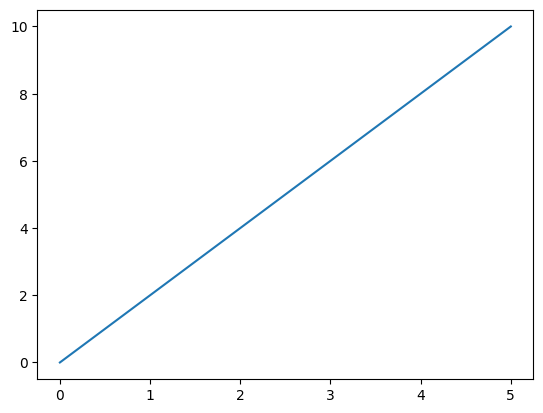

In [65]:
# Create an array of values from 0 to 10 (step of 2)
data_1 = np.arange(0, 12, 2)

# Plot the data as a line chart
plt.plot(data_1)

####figure objects and component charts

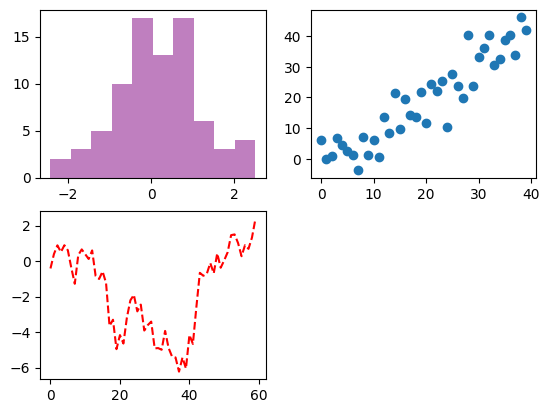

In [67]:
# Create a figure
fig = plt.figure()

# Add subplots in a 2x2 grid (only three subplots are used)
ax_1 = fig.add_subplot(2, 2, 1)  # First subplot (top-left)
ax_2 = fig.add_subplot(2, 2, 2)  # Second subplot (top-right)
ax_3 = fig.add_subplot(2, 2, 3)  # Third subplot (bottom-left)

# Plot a histogram with 80 random standard normal values
ax_1.hist(np.random.standard_normal(80), bins=10, color='purple', alpha=0.5)

# Create a scatter plot with x values from 0 to 39 and y values with added noise
ax_2.scatter(np.arange(40), np.arange(40) + 5 * np.random.standard_normal(40))

# Plot a cumulative sum of 60 random standard normal values as a dashed red line
ax_3.plot(np.random.standard_normal(60).cumsum(), color='red', linestyle='dashed');

####modification of the margins of the component diagrams

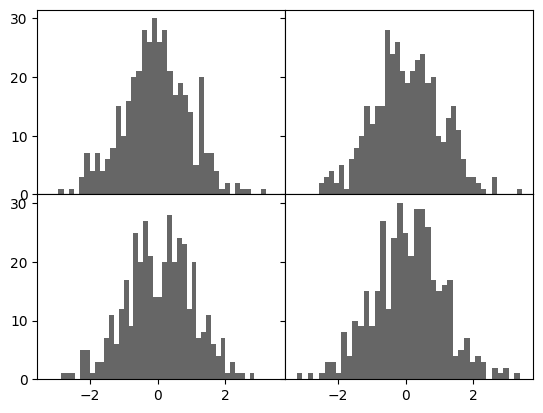

In [68]:
# Create a figure with a 2x2 grid of subplots, sharing x and y axes
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

# Loop through the subplot grid and plot a histogram in each
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.standard_normal(400), bins=40, color='black', alpha=0.6)

# Adjust spacing between subplots to remove gaps
fig.subplots_adjust(wspace=0, hspace=0)


####colours, markings and line styles

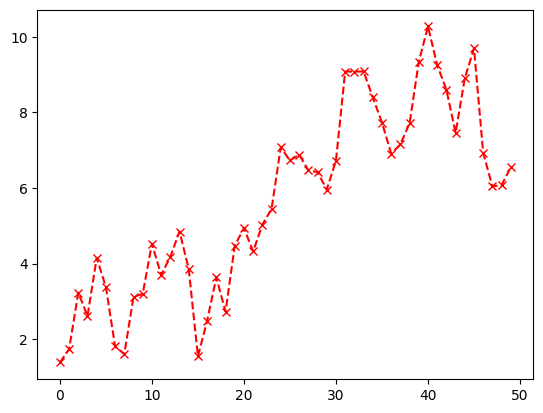

In [85]:
plt.plot(np.random.standard_normal(50).cumsum(), color='red', linestyle='dashed', marker='x');

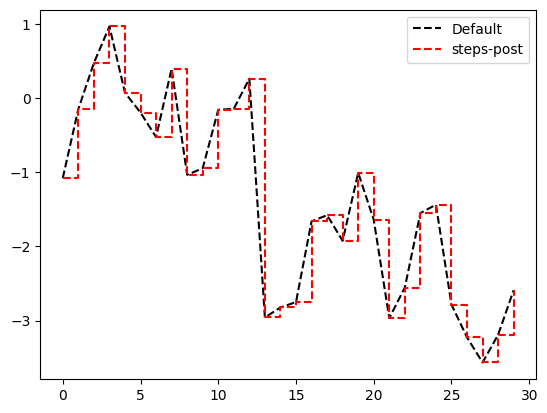

In [100]:
# Generate cumulative sum of 30 random standard normal values
data = np.random.standard_normal(30).cumsum()

# Plot a dashed black line (default drawing style)
plt.plot(data, color='black', linestyle='dashed', label='Default')

# Plot the same data with 'steps-post' drawing style in red
plt.plot(data, color='red', linestyle='dashed', drawstyle='steps-post', label='steps-post')

# Add a legend to distinguish the plots
plt.legend();

####points, labels and legends

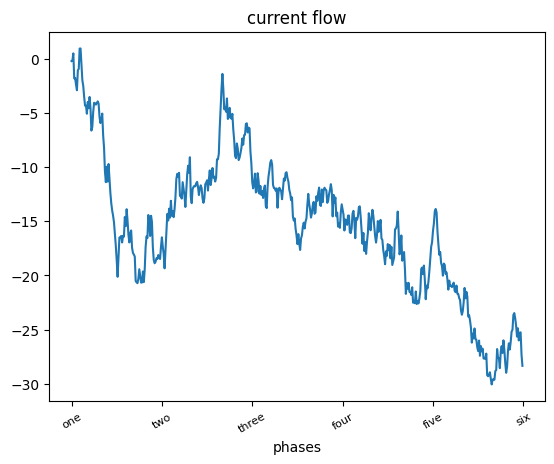

In [119]:
fig, ax = plt.subplots()

ax.plot(np.random.standard_normal(500).cumsum())

ticks =  ax.set_xticks([0, 100, 200, 300, 400, 500])

labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five', 'six'], rotation=30, fontsize=8)

ax.set_xlabel('phases')
ax.set_title('current flow');

####adding a legend

NameError: name 'x' is not defined

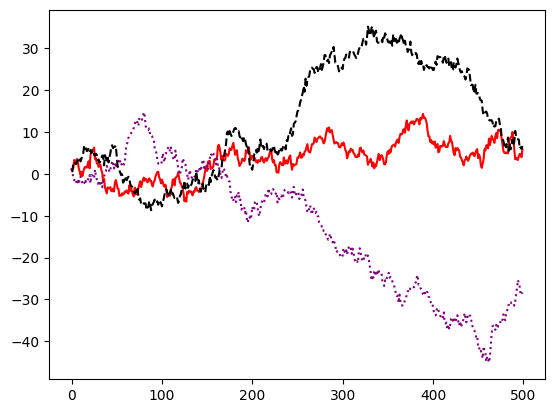

In [138]:
# Create a figure and axis
fig, ax = plt.subplots()

# Plot three cumulative sum lines with unique labels
ax.plot(np.random.randn(500).cumsum(), color='red', label='one')
ax.plot(np.random.randn(500).cumsum(), color='purple', label='two (dotted)', linestyle='dotted')
ax.plot(np.random.randn(500).cumsum(), color='black', label='three (dashed)', linestyle='dashed')

# Add a legend
ax.legend()

####recording of graphs

In [143]:
# Save the figure as a PDF file
fig.savefig('figpath.pdf', dpi=300, bbox_inches='tight')

In [140]:
# Save the figure as a png
fig.savefig('figpath.png')